In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functions import *

In [2]:
df=pd.read_csv("./Data/german.data", sep=" ", header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
headers = ["Status of existing checking account","Duration in month","Credit history",
         "Purpose","Credit amount","Savings account/bonds","Present employment since",
         "Installment rate in percentage of disposable income","Personal status and sex",
         "Other debtors / guarantors","Present residence since","Property","Age in years",
        "Other installment plans","Housing","Number of existing credits at this bank",
        "Job","Number of people being liable to provide maintenance for","Telephone","foreign worker","Risk"]
df.columns = headers

In [5]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [6]:
df.shape

(1000, 21)

In [7]:
df.isna().sum()

Status of existing checking account                         0
Duration in month                                           0
Credit history                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age in years                                                0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

In [8]:
Status_of_existing_checking_account = {"A11" : "... <    0 DM",
                                       "A12" : "0 <= ... <  200 DM",
                                       "A13" : "... >= 200 DM / salary assignments for at least 1 year",
                                       "A14" : "no checking account"}
df["Status of existing checking account"] = df["Status of existing checking account"].map(Status_of_existing_checking_account)

Credit_history={"A30" : "no credits taken / all credits paid back duly",
                "A31" : "all credits at this bank paid back duly",
                "A32" : "existing credits paid back duly till now",
                "A33" : "delay in paying off in the past",
                "A34" : "critical account / other credits existing (not at this bank)"}
df["Credit history"] = df["Credit history"].map(Credit_history)

Purpose={"A40" : "car (new)",
         "A41" : "car (used)",
         "A42" : "furniture/equipment",
         "A43" :"radio/television",
         "A44" : "domestic appliances",
         "A45" : "repairs",
         "A46" : "education",
         "A47" : "(vacation - does not exist?)",
         "A48" : "retraining",
         "A49" : "business",
         "A410" : "others"}
df["Purpose"]=df["Purpose"].map(Purpose)

Savings_account_bonds={"A61" : "... <  100 DM",
                       "A62" : "100 <= ... <  500 DM",
                       "A63" : "500 <= ... < 1000 DM",
                       "A64" : ".. >= 1000 DM",
                       "A65" : "unknown/ no savings account"}
df["Savings account/bonds"]=df["Savings account/bonds"].map(Savings_account_bonds)

Present_employment_since={"A71" : "unemployed",
                          "A72" : "... < 1 year",
                          "A73" : "1  <= ... < 4 years",
                          "A74" : "4  <= ... < 7 years",
                          "A75" : ".. >= 7 years"}
df["Present employment since"]=df["Present employment since"].map(Present_employment_since)

Personal_status_and_sex={"A91" : "male:divorced/separated",
                         "A92" : "female:divorced/separated/married",
                         "A93" : "male:single",
                         "A94" : "male:married/widowed",
                         "A95" : "female:single"}
df["Personal status and sex"]=df["Personal status and sex"].map(Personal_status_and_sex)

Other_debtors_guarantors={"A101" : "none",
                          "A102" : "co-applicant",
                          "A103" : "guarantor"}
df["Other debtors / guarantors"]=df["Other debtors / guarantors"].map(Other_debtors_guarantors)

Property={"A121" : "real estate",
          "A122" : "building society savings agreement / life insurance",
          "A123" : "car or other",
          "A124" : "unknown / no property"}
df["Property"]=df["Property"].map(Property)

Other_installment_plans={"A141" : "bank",
                         "A142" : "stores",
                         "A143" : "none"}
df["Other installment plans"]=df["Other installment plans"].map(Other_installment_plans)

Housing={"A151" : "rent",
         "A152" : "own",
         "A153" : "for free"}
df["Housing"]=df["Housing"].map(Housing)

Job={"A171" : "unemployed/ unskilled  - non-resident",
     "A172" : "unskilled - resident",
     "A173" : "skilled employee / official",
     "A174" : "management/ self-employed/highly qualified employee/ officer"}
df["Job"]=df["Job"].map(Job)

Telephone={"A191" : "none",
           "A192" : "yes, registered under the customers name"}
df["Telephone"]=df["Telephone"].map(Telephone)

foreign_worker={"A201" : "yes",
                "A202" : "no"}
df["foreign worker"]=df["foreign worker"].map(foreign_worker)

#Risk={1:"Good Risk",
#      2:"Bad Risk"}
#df["Risk"]=df["Risk"].map(Risk)
df.Risk.replace([1,2], [1,0], inplace=True)

In [10]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Risk
0,... < 0 DM,6,critical account / other credits existing (not...,radio/television,1169,unknown/ no savings account,.. >= 7 years,4,male:single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female:divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,0
2,no checking account,12,critical account / other credits existing (not...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male:single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male:single,guarantor,...,building society savings agreement / life insu...,45,none,for free,1,skilled employee / official,2,none,yes,1
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male:single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,0


In [11]:
df.dtypes

Status of existing checking account                         object
Duration in month                                            int64
Credit history                                              object
Purpose                                                     object
Credit amount                                                int64
Savings account/bonds                                       object
Present employment since                                    object
Installment rate in percentage of disposable income          int64
Personal status and sex                                     object
Other debtors / guarantors                                  object
Present residence since                                      int64
Property                                                    object
Age in years                                                 int64
Other installment plans                                     object
Housing                                                     ob

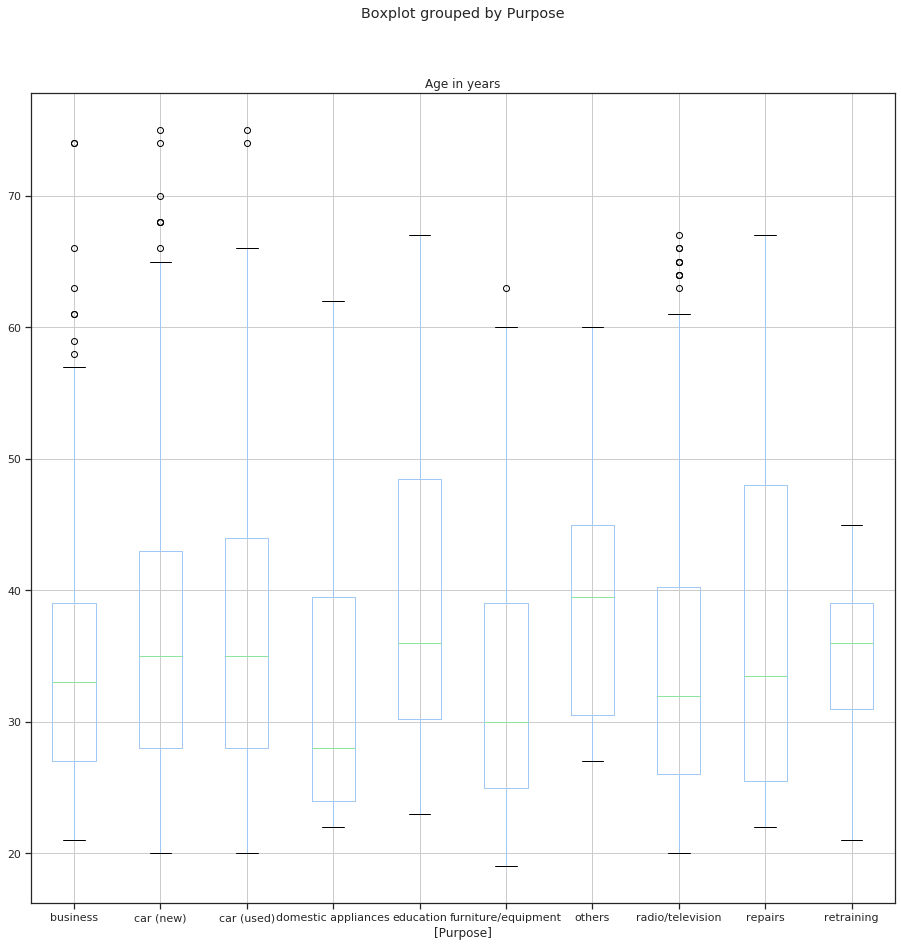

In [60]:
df.boxplot(by = ["Purpose"], column = ["Age in years"], figsize=(15, 15));

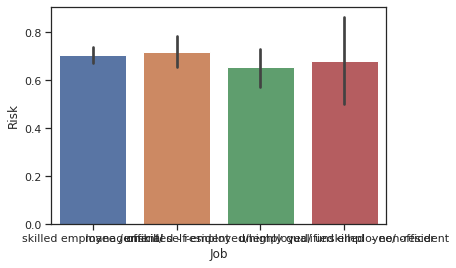

In [51]:
sns.barplot(x = df["Job"], y = df["Risk"]);

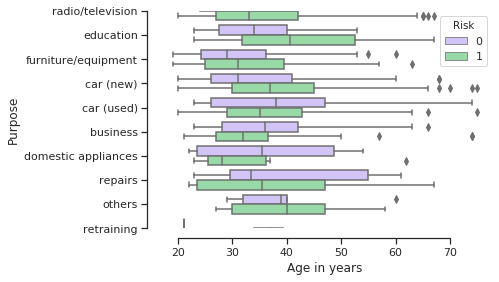

In [59]:
sns.set(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Age in years", y="Purpose",
            hue="Risk", palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

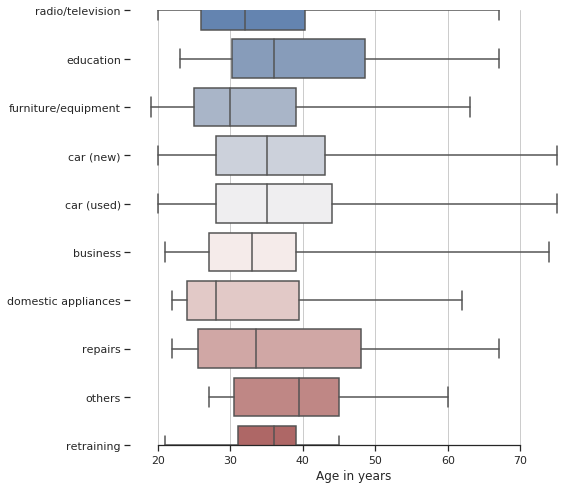

In [46]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 8))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="Age in years", y="Purpose", data=df,
            whis="range", palette="vlag")

# Add in points to show each observation
#sns.swarmplot(x="Age in years", y="Purpose", data=df,
              #size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

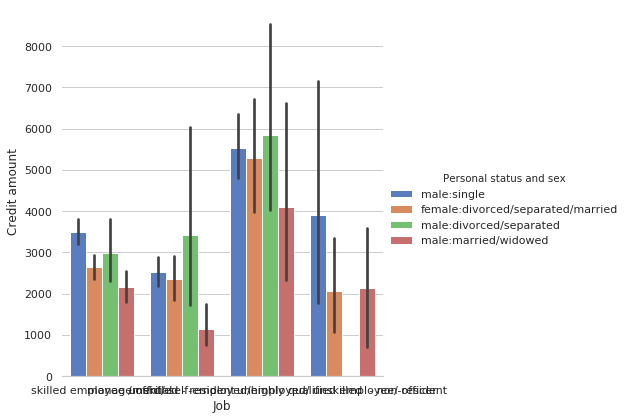

In [57]:
sns.set(style="whitegrid")
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Job", y="Credit amount", hue="Personal status and sex", data=df, height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Credit amount")

# StandardScaler

In [12]:
var_num = ["Duration in month",
           "Credit amount",
           "Installment rate in percentage of disposable income",
          "Present residence since",
          "Age in years",
          "Number of existing credits at this bank",
          "Number of people being liable to provide maintenance for"]

In [13]:
from sklearn.preprocessing import StandardScaler

data_num = StandardScaler().fit_transform(df[var_num])
data_num = pd.DataFrame(data_num, columns = var_num)

In [14]:
data_num

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869
...,...,...,...,...,...,...,...
995,-0.738668,-0.544162,0.024147,1.046987,-0.399832,-0.704926,-0.428290
996,0.754763,0.207612,0.918477,1.046987,0.391740,-0.704926,-0.428290
997,-0.738668,-0.874503,0.918477,1.046987,0.215835,-0.704926,-0.428290
998,1.999289,-0.505528,0.918477,1.046987,-1.103451,-0.704926,-0.428290


In [15]:
data_num = df[var_num]

# Label Encoder

In [16]:
var_quali = ["Status of existing checking account",
             "Credit history",
             "Purpose",
             "Savings account/bonds",
             "Present employment since",
             "Personal status and sex",
             "Other debtors / guarantors",
             "Property",
             "Other installment plans",
             "Housing",
             "Job",
             "Telephone",
             "foreign worker"]

In [17]:
from sklearn.preprocessing import LabelEncoder
data_quali = []
data_quali = pd.DataFrame(data_quali)
for i in var_quali:
    data_quali[i] = LabelEncoder().fit_transform(df[i].values)

In [18]:
for i in var_quali:
    print(i,":\n", df[i].unique(), "\n")
    print("=========>", data_quali[i].unique(), "\n")
    print("-------------------------------------------------")

Status of existing checking account :
 ['... <    0 DM' '0 <= ... <  200 DM' 'no checking account'
 '... >= 200 DM / salary assignments for at least 1 year'] 

=========> [0 2 3 1] 

-------------------------------------------------
Credit history :
 ['critical account / other credits existing (not at this bank)'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'no credits taken / all credits paid back duly'
 'all credits at this bank paid back duly'] 

=========> [1 3 2 4 0] 

-------------------------------------------------
Purpose :
 ['radio/television' 'education' 'furniture/equipment' 'car (new)'
 'car (used)' 'business' 'domestic appliances' 'repairs' 'others'
 'retraining'] 

=========> [7 4 5 1 2 0 3 8 6 9] 

-------------------------------------------------
Savings account/bonds :
 ['unknown/ no savings account' '... <  100 DM' '500 <= ... < 1000 DM'
 '.. >= 1000 DM' '100 <= ... <  500 DM'] 

=========> [4 1 3 0 2] 

----------------------------

In [19]:
dummy_var = pd.get_dummies(df[var_quali])
data = pd.concat([data_num, dummy_var, df.Risk], axis = 1)
data

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Status of existing checking account_... < 0 DM,Status of existing checking account_... >= 200 DM / salary assignments for at least 1 year,Status of existing checking account_0 <= ... < 200 DM,...,Housing_rent,Job_management/ self-employed/highly qualified employee/ officer,Job_skilled employee / official,Job_unemployed/ unskilled - non-resident,Job_unskilled - resident,Telephone_none,"Telephone_yes, registered under the customers name",foreign worker_no,foreign worker_yes,Risk
0,6,1169,4,4,67,2,1,1,0,0,...,0,0,1,0,0,0,1,0,1,1
1,48,5951,2,2,22,1,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,0,0,0,0,1,1,0,0,1,1
3,42,7882,2,4,45,1,2,1,0,0,...,0,0,1,0,0,1,0,0,1,1
4,24,4870,3,4,53,2,2,1,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,0,0,...,0,0,0,0,1,1,0,0,1,1
996,30,3857,4,4,40,1,1,1,0,0,...,0,1,0,0,0,0,1,0,1,1
997,12,804,4,4,38,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,1
998,45,1845,4,4,23,1,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0


# Risk

In [20]:
df.Risk.value_counts()

1    700
0    300
Name: Risk, dtype: int64

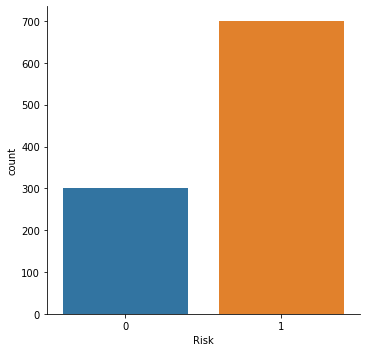

In [21]:
sns.catplot(x='Risk', kind="count", data=df)

# Sampling

In [22]:
from sklearn.model_selection import train_test_split

X = data.drop('Risk', axis=1)
y = data.Risk

X_scaled = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled ,y , test_size=0.3, random_state=1)

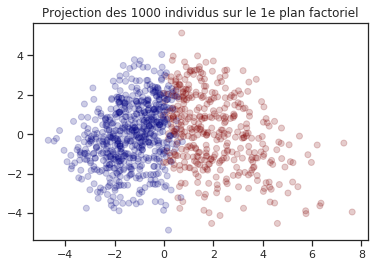

In [68]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2)
km.fit(X_scaled)
clusters = km.labels_

from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca.fit(X_scaled)

X_projected = pca.transform(X_scaled)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)